<h3>
   Socio-economic Impact on Green Jobs: An EDA Approach
</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import shapiro, kstest, normaltest, kruskal, friedmanchisquare, mannwhitneyu
import scikit_posthocs as sp

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [4]:
# Set visual display settings
sns.set(style='whitegrid')

In [5]:
# load csv
df = pd.read_csv('complete_renewable_energy_dataset 2.csv')

In [6]:
# Get the first few rows of the data
df.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


<h4>Normalize Dataset</h4>

In [7]:
# Remove categorical columns
cat_cols = ['Year', 'Country', 'Energy Type']
numeric_df = df.drop(cat_cols, axis=1)

# Normalize the numeric columns
# scaler = StandardScaler()
# df_normalized = scaler.fit_transform(numeric_df)

# Convert the normalized data back to a DataFrame
# normalized_df = pd.DataFrame(df_normalized, columns=numeric_df.columns)

# Add back the categorical columns
# normalized_df = pd.concat([df[cat_cols], normalized_df], axis=1)

<h4>Statistical Analysis</h4>

In [8]:
# Remove categorical columns
cat_cols = ['Year', 'Country', 'Energy Type']
numeric_df = df.drop(cat_cols, axis=1)

<h5>Test for Normal Distribution</h5>

In [9]:
# Perform Kolmogorov-Smirnov test
statistic, p_value = kstest(numeric_df, 'norm')
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpret the result
if p_value.all() < 0.05:
    print('Reject the null hypothesis: data is not normally distributed.')
else:
    print('Fail to reject the null hypothesis: data is normally distributed.')

Statistic: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.5        1.
 0.5        0.75331609 1.         1.         0.84314381 0.96988911
 0.96529922 0.96535974 0.99757492 0.50007828 0.51995957 1.
 1.         0.7960819  0.5        0.9691279  0.97298403 0.5
 0.99796833 0.78618267 0.5        0.5        0.97027    0.975883
 0.97307203 0.5        0.79245893 0.79158108 0.79781711 0.78990731
 0.79174098 0.97352801 0.96665101 0.96808141 0.9934501  0.9690501
 0.9996     1.         0.9707876  0.5        0.5       ], p-value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Reject the null hypothesis: data is not normally distributed.


In [10]:
# Perform D'Agostino's K-squared test
statistic, p_value = normaltest(numeric_df)
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpret the result
if p_value.all() < 0.05:
    print('Reject the null hypothesis: data is not normally distributed.')
else:
    print('Fail to reject the null hypothesis: data is normally distributed.')

Statistic: [1793.56734144 2202.23220061 2028.95367597 2728.94529035 2592.98267878
 2853.63063148 2096.59580022 2185.06509459 2678.25702193 2045.24476985
 8872.3995029  1909.52158866 8867.97078962 2344.41727218 1876.34982582
 2941.9207164  2685.29692741 1940.26665691 2522.05099133 2075.00279186
 1887.26468459 1855.73269529 2328.93567181 2180.04086545 2224.66933814
 1527.08687651 8869.1930385  1683.08537329 2076.77293829 8881.87828276
 1810.13206671 1966.5938151  8870.66910056 8869.65683357 1677.05210906
 2756.4110025  1430.06890501 8881.87828276 2019.14934927 1935.39017646
 2021.67817767 2411.53400114 2247.98984032 1535.12928759 2075.28920186
 1783.38861026 3109.47426573 1977.33921631 1826.19533852 3035.15670922
 2338.2476225  8878.26234982 8927.60157543], p-value: [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+0

<h4>Non-Parametric Statistically Difference Test</h4>

In [11]:
# Perform Kruskal-Wallis test 
# Group data by 'Year'
grouped_data = [group['Renewable Energy Jobs'].values for name, group in df.groupby('Educational Level')]

statistic, p_value = kruskal(*grouped_data)
print(f'Kruskal-Wallis H statistic: {statistic}, p-value: {p_value}')

if p_value.all() < 0.05:
    print("Reject the null hypothesis: There are significant differences in the median job counts across years.")
else:
    print("Fail to reject the null hypothesis: No significant differences in the median job counts across years.")

Kruskal-Wallis H statistic: 2498.999999999999, p-value: 0.4962379669342791
Fail to reject the null hypothesis: No significant differences in the median job counts across years.


In [12]:
group1 = df[df['Country'] == 'USA']['Renewable Energy Jobs']
group2 = df[df['Country'] == 'Australia']['Renewable Energy Jobs']
group3 = df[df['Country'] == 'Japan']['Renewable Energy Jobs']
group4 = df[df['Country'] == 'China']['Renewable Energy Jobs']
group5 = df[df['Country'] == 'India']['Renewable Energy Jobs']
group6 = df[df['Country'] == 'Germany']['Renewable Energy Jobs']
group7 = df[df['Country'] == 'France']['Renewable Energy Jobs']
group8 = df[df['Country'] == 'Brazil']['Renewable Energy Jobs']
group9 = df[df['Country'] == 'Russia']['Renewable Energy Jobs']
group10 = df[df['Country'] == 'Canada']['Renewable Energy Jobs']


# Perform the Kruskal-Wallis test
stat, p_value = kruskal(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

# Print results
print(f'Kruskal-Wallis H statistic: {stat}, p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value.any() < alpha:
    print("Reject the null hypothesis: There are significant differences in renewable energy jobs across countries")
else:
    print("Fail to reject the null hypothesis: No significant differences in renewable energy jobs across countries")

Kruskal-Wallis H statistic: 4.562263917230889, p-value: 0.870677739693545
Fail to reject the null hypothesis: No significant differences in renewable energy jobs across countries


In [13]:
# Group renewable energy usage by category factor (e.g., income level)
group1 = df[df['Energy Type'] == 'Solar']['Renewable Energy Jobs']
group2 = df[df['Energy Type'] == 'Wind']['Renewable Energy Jobs']
group3 = df[df['Energy Type'] == 'Hydro']['Renewable Energy Jobs']
group4 = df[df['Energy Type'] == 'Geothermal']['Renewable Energy Jobs']
group5 = df[df['Energy Type'] == 'Biomass']['Renewable Energy Jobs']


# Perform the Kruskal-Wallis test
stat, p_value = kruskal(group1, group2, group3, group4, group5)

# Print results
print(f'Kruskal-Wallis H statistic: {stat}, p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value.any() < alpha:
    print("Reject the null hypothesis: There are significant differences in renewable energy jobs between energy types.")
else:
    print("Fail to reject the null hypothesis: No significant differences in renewable energy jobs between energy types.")

Kruskal-Wallis H statistic: 6.128419326862509, p-value: 0.18976091067905912
Fail to reject the null hypothesis: No significant differences in renewable energy jobs between energy types.


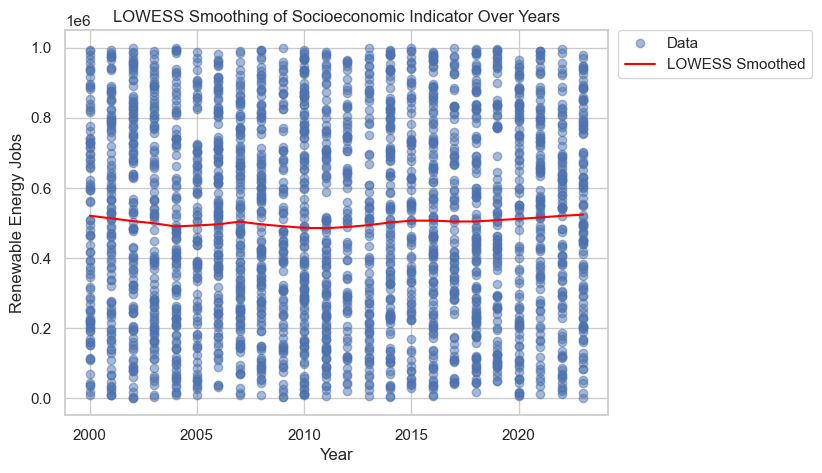

In [14]:
# Fit LOWESS to the data
lowess = sm.nonparametric.lowess(df['Renewable Energy Jobs'], df['Year'], frac=0.3)

# Plotting results
plt.figure(figsize=(7, 5))
plt.scatter(df['Year'], df['Renewable Energy Jobs'], alpha=0.5, label='Data')
plt.plot(lowess[:, 0], lowess[:, 1], color='red', label='LOWESS Smoothed')
plt.title('LOWESS Smoothing of Socioeconomic Indicator Over Years')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Jobs')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

<h4>Non-Parametric Regression</h4>

In [15]:
# Prepare the data
X = df[['Country', 'Energy Type', 'Year']]
y = df['Renewable Energy Jobs']

# Encode categorical variables
encoder = LabelEncoder()
X['Country'] = encoder.fit_transform(X['Country'])
X['Energy Type'] = encoder.fit_transform(X['Energy Type'])

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X, y)

# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Make predictions
dt_pred = dt_model.predict(X)
rf_pred = rf_model.predict(X)

# Evaluate the models
dt_mse = mean_squared_error(y, dt_pred)
rf_mse = mean_squared_error(y, rf_pred)

print(f'Decision Tree MSE: {dt_mse:.2f}')
print(f'Random Forest MSE: {rf_mse:.2f}')

/var/folders/t8/kz2v06bs11bf32v6h9jcln_m0000gn/T/ipykernel_1629/3977793333.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Country'] = encoder.fit_transform(X['Country'])
/var/folders/t8/kz2v06bs11bf32v6h9jcln_m0000gn/T/ipykernel_1629/3977793333.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Energy Type'] = encoder.fit_transform(X['Energy Type'])


Decision Tree MSE: 49248745793.81
Random Forest MSE: 51250043186.95


<h4>Feature Importance</h4>

In [16]:
# Initialize LabelEncoder
le_ir = LabelEncoder()
le_gdp = LabelEncoder()
le_prod = LabelEncoder()

# Encode categorical variables
df['Industrialization Rate'] = le_ir.fit_transform(df['Industrialization Rate'])
df['GDP'] = le_gdp.fit_transform(df['GDP'])
df['Production (GWh)'] = le_prod.fit_transform(df['Production (GWh)'])

# Check the encoding
print(df[['Industrialization Rate', 'GDP', 'Production (GWh)']].head())

   Industrialization Rate   GDP  Production (GWh)
0                     229  2225              2163
1                     742   779               570
2                     257  1946              2381
3                     450  1674              2263
4                    1113  1070              2362


In [17]:
# Define features and target variable
X = df[['Industrialization Rate', 'GDP', 'Production (GWh)']]
y = df['Renewable Energy Jobs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize and fit the model
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# Initialize and fit the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [19]:
# Get feature importance
importances = dt_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                  Feature  Importance
0  Industrialization Rate    0.381942
1                     GDP    0.328839
2        Production (GWh)    0.289219


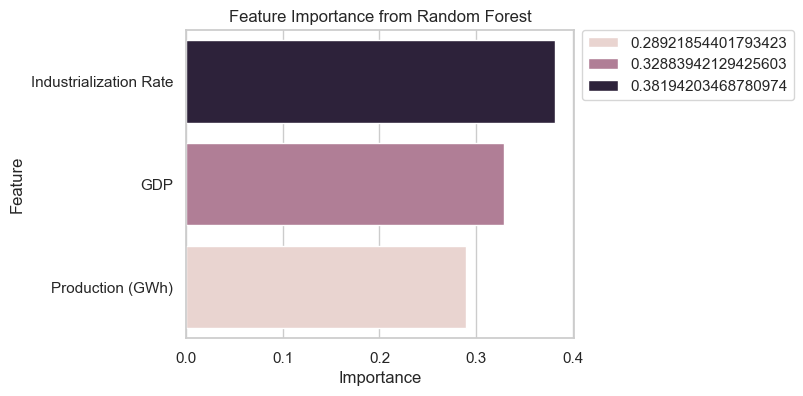

In [20]:
# Plotting feature importance
plt.figure(figsize=(5, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Importance')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Feature Importance from Random Forest')
plt.show()

In [21]:
# Decision Tree
X6 = df[['GDP', 'R&D Expenditure', 'Investments (USD)', 'Population', 'International Aid for Renewables', 'Energy Subsidies', 
          'Energy Consumption','Energy Sector Workforce', 'CO2 Emissions']]
y6 = df['Renewable Energy Jobs']
model6 = DecisionTreeRegressor()
model6.fit(X6, y6)
print('Feature Importances:', model6.feature_importances_)

Feature Importances: [0.11646768 0.10961761 0.09873584 0.13098857 0.08895066 0.09237433
 0.11565301 0.12026757 0.12694474]


In [22]:
# Assuming your data has columns named 'Jobs' and 'GDP'
jobs = df['Innovation Index'].to_list()
gdp = df['Renewable Energy Jobs'].to_list()

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(jobs, gdp)
print('Mann-Whitney U Statistic:', stat)
print('p-value:', p)

# Interpret the results
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Mann-Whitney U Statistic: 0.0
p-value: 0.0
Different distribution (reject H0)


In [23]:
# Perform Kruskal-Wallis test
stat, p = kruskal(jobs, gdp)
print('Kruskal-Wallis Statistic:', stat)
print('p-value:', p)

# Interpret the results
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Kruskal-Wallis Statistic: 3749.2501501499723
p-value: 0.0
Different distribution (reject H0)


In [24]:
# Parametric Test for analyzing relationship between continuous variables without categorization 

In [30]:
# Simple Linear Regression
X1 = df['Educational Level']
y1 = df['Renewable Energy Jobs']
X1 = sm.add_constant(X1)  # Adds a constant term to the predictor

model = sm.OLS(y1, X1).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Renewable Energy Jobs   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                  0.001
Method:                    Least Squares   F-statistic:                     3.661
Date:                   Mon, 23 Sep 2024   Prob (F-statistic):             0.0558
Time:                           18:05:42   Log-Likelihood:                -34961.
No. Observations:                   2500   AIC:                         6.993e+04
Df Residuals:                       2498   BIC:                         6.994e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const   

In [26]:
# Reshape the data
X22 = df['GDP'].values.reshape(-1, 1) # Independent variable
y22 = df['Renewable Energy Jobs'].values # Dependent variable

# Create and fit the model
model22 = LinearRegression()
model22.fit(X22, y22)

# Get the slope (coefficient) and intercept
slope = model22.coef_[0]
intercept = model22.intercept_

In [27]:
# Generate predictions
predictions = model22.predict(X22)

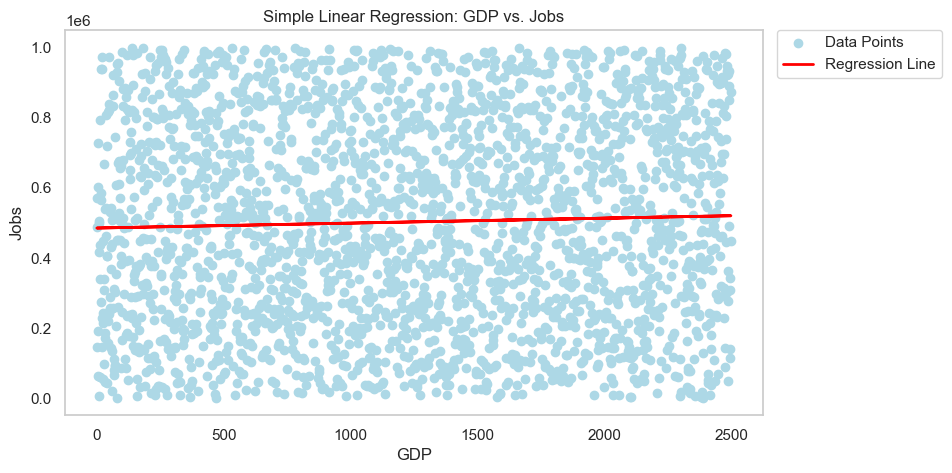

In [28]:
# Create scatter plot
plt.figure(figsize=(9, 5))
plt.scatter(df['GDP'], df['Renewable Energy Jobs'], color='lightblue', label='Data Points')

# Plot regression line
plt.plot(df['GDP'], predictions, color='red', linewidth=2, label='Regression Line')

# Add titles and labels
plt.title('Simple Linear Regression: GDP vs. Jobs')
plt.xlabel('GDP')
plt.ylabel('Jobs')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid()

# Show the plot
plt.show()